<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastián Alonso Fuentes Araneda</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

https://github.com/larryfishermn/EIE_401_MULTIMEDIA

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    


<p align="justify">
Se descomprime el archivo txt que esta en formato .gz.

In [1]:
import gzip

with gzip.open('H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz', 'rb') as f_in:
    data = f_in.read()

with open('txtActividad', 'wb') as f_out:
    f_out.write(data)


<p align="justify">
Se expresan los graficos de los 2 archivos usando la libreria Matplotlib

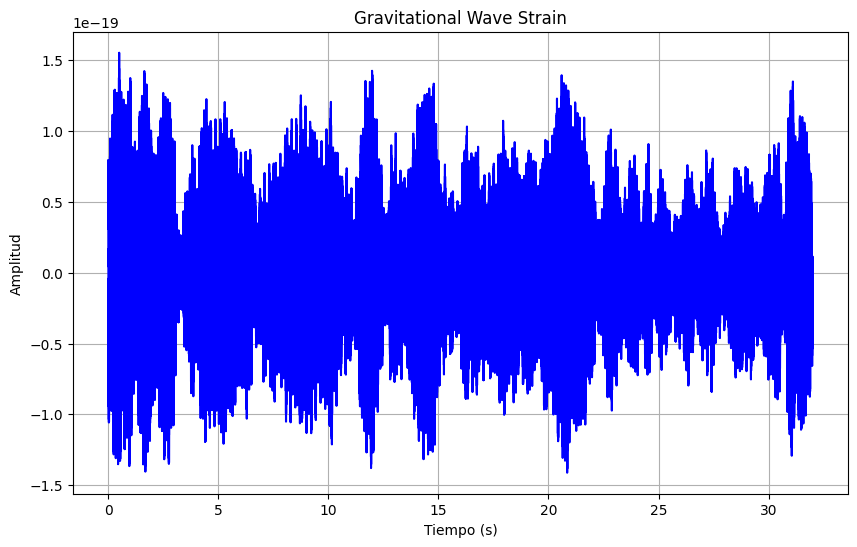

In [8]:
import matplotlib.pyplot as plt

# Nombre del archivo
file_name = 'Actividad.txt'  # Actualiza con el nombre de tu archivo

# Lectura de los datos del archivo
data = []
with open(file_name, 'r') as file:
    for line in file:
        # Ignorar líneas de comentarios y vacías
        if not line.startswith('#') and line.strip():
            data.append(float(line))

# Crear una lista de tiempo basada en el número de muestras por segundo
sample_rate = 16384  # Muestras por segundo
duration = 32  # Duración en segundos
time = [(1/sample_rate) * i for i in range(len(data))]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(time, data, color='blue')
plt.title('Gravitational Wave Strain')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()



Ahora se procede a graficar el archivo CSV.

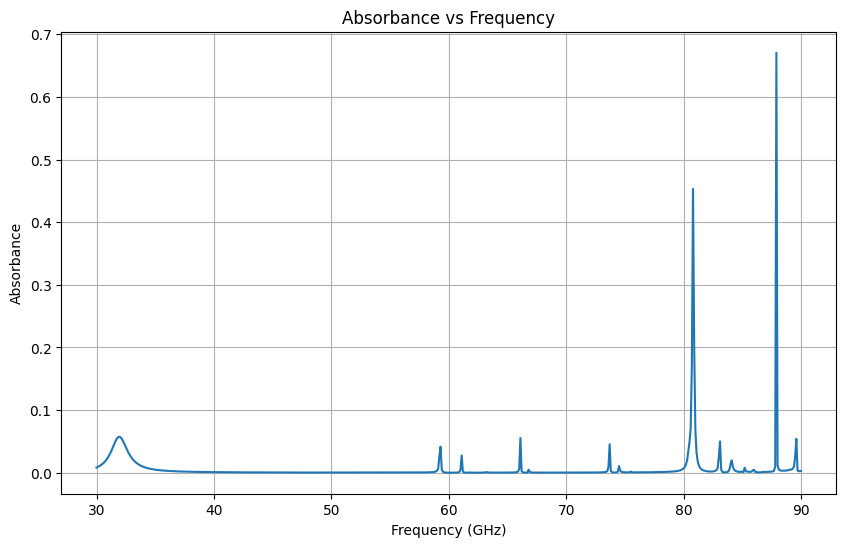

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
data = pd.read_csv("AbsorbanceTE_0-0.csv")

# Adquirir los datos
freq = data["Freq [GHz]"]
absorbance = data["AbsorbanceTE []"]

# Presentar los datos en gráficos usando Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(freq, absorbance)
plt.title('Absorbance vs Frequency')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Absorbance')
plt.grid(True)
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


$$
f(x) = \sin(2\pi x) + 0.5\cos(5\pi x) + \sin(7\pi x) + 0.3\cos(12\pi x)
$$

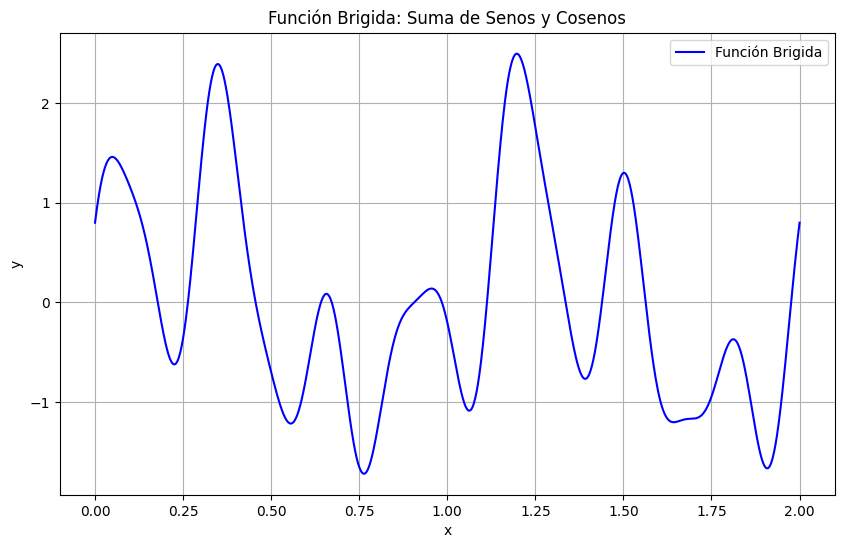

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def funcion_brigida(x):
    return np.sin(2*np.pi*x) + 0.5*np.cos(5*np.pi*x) + np.sin(7*np.pi*x) + 0.3*np.cos(12*np.pi*x)

# Creación de puntos x
x = np.linspace(0, 2, 1000)

# Evaluación de la función en los puntos x
y = funcion_brigida(x)

# Gráfico de la función
plt.figure(figsize=(10,6))
plt.plot(x, y, color='blue', label='Función Brigida')
plt.title('Función Brigida: Suma de Senos y Cosenos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

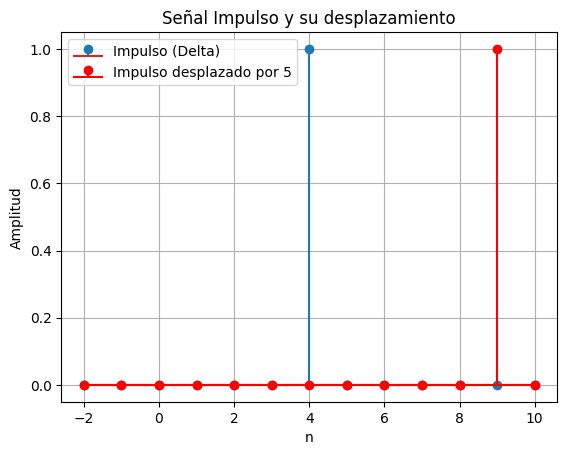

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de la señal
n = np.arange(-2, 11)

# Crear la señal impulso (delta)
delta = np.zeros_like(n)
delta[len(n)//2] = 1

# Desplazar la señal
desplazamiento = 5
delta_desplazada = np.roll(delta, desplazamiento)

# Graficar las señales
plt.stem(n, delta, label='Impulso (Delta)')
plt.stem(n, delta_desplazada, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Impulso desplazado por {desplazamiento}')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Señal Impulso y su desplazamiento')
plt.legend()
plt.grid(True)
plt.show()





### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

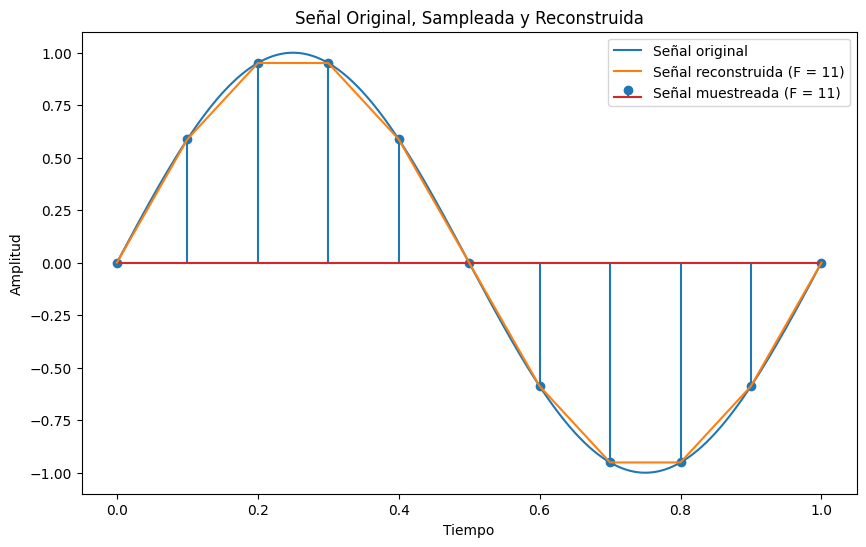

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal original
def original_signal(x):
    return np.sin(2 * np.pi * x)

# Frecuencia máxima de la señal original
Fmax = 1  # La frecuencia máxima de una señal sinusoidal es igual a su frecuencia fundamental

# Frecuencia de muestreo
f = 10 + 1  # Definimos la frecuencia de muestreo

# Rango de valores de x para la señal original
x_values = np.linspace(0, 1, 1000)

# Muestrear la señal original
x_sampled = np.linspace(0, 1, f)
y_sampled = original_signal(x_sampled)

# Reconstruir la señal a partir del muestreo usando interpolación lineal
reconstructed_signal = np.interp(x_values, x_sampled, y_sampled)

# Graficar la señal original, la señal muestreada y la señal reconstruida
plt.figure(figsize=(10, 6))

plt.plot(x_values, original_signal(x_values), label='Señal original')
plt.stem(x_sampled, y_sampled, label=f'Señal muestreada (F = {f})')
plt.plot(x_values, reconstructed_signal, label=f'Señal reconstruida (F = {f})')

plt.title('Señal Original, Sampleada y Reconstruida')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.show()






### 3.3 Genere una señal Triangular y realice la operación de sampleo

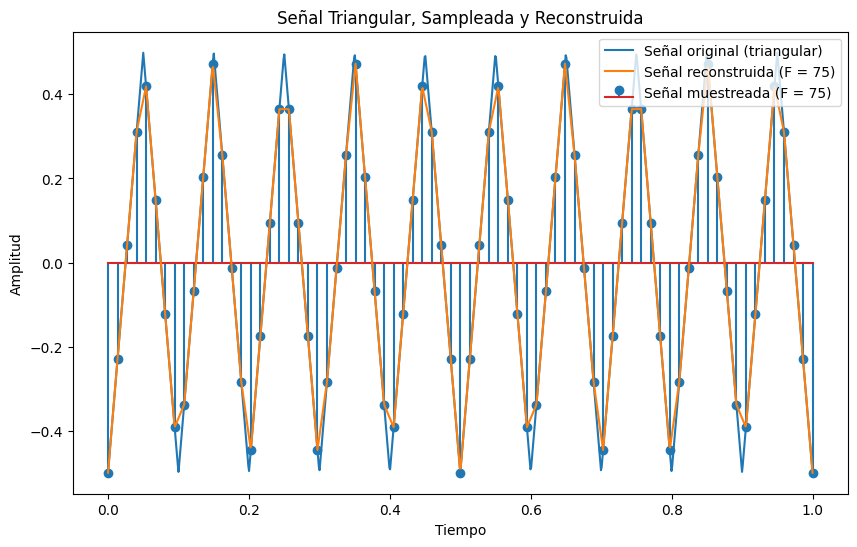

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal triangular
def triangular_signal(x):
    period = 1 / 10  # Periodo de la señal en segundos (frecuencia de 10 Hz)
    amplitude = 1.0
    return amplitude * (2 * np.abs((x / period) - np.floor(0.5 + (x / period)))) - amplitude / 2

# Definición de la frecuencia de muestreo
f = 75  # Frecuencia de muestreo

# Rango de valores de x para la señal original
x_values = np.linspace(0, 1, 1000)

# Muestrear la señal original
x_sampled = np.linspace(0, 1, f)
y_sampled = triangular_signal(x_sampled)

# Reconstruir la señal a partir del muestreo usando interpolación lineal
reconstructed_signal = np.interp(x_values, x_sampled, y_sampled)

# Graficar la señal original, la señal sampleada y la señal reconstruida
plt.figure(figsize=(10, 6))

plt.plot(x_values, triangular_signal(x_values), label='Señal original (triangular)')
plt.stem(x_sampled, y_sampled, label=f'Señal muestreada (F = {f})')
plt.plot(x_values, reconstructed_signal, label=f'Señal reconstruida (F = {f})')

plt.title('Señal Triangular, Sampleada y Reconstruida')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

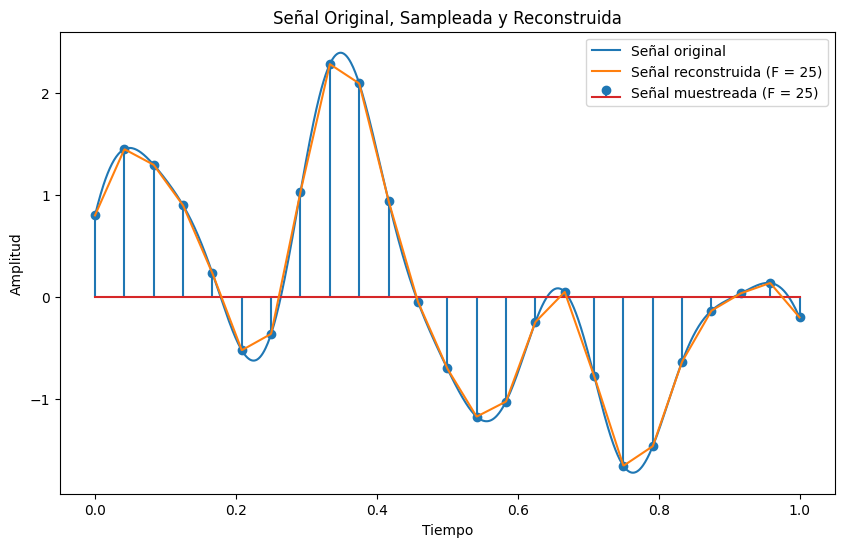

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal original
def original_signal(x):
    return np.sin(2*np.pi*x) + 0.5*np.cos(5*np.pi*x) + np.sin(7*np.pi*x) + 0.3*np.cos(12*np.pi*x)

# Frecuencia máxima de la señal original
Fmax = 12

# Definición de la frecuencia de muestreo
f = 25  # Frecuencia de muestreo

# Rango de valores de x para la señal original
x_values = np.linspace(0, 1, 1000)

# Muestrear la señal original
x = np.linspace(0, 1, f)
y = original_signal(x_sampled)

# Reconstruir la señal a partir del muestreo usando interpolación lineal
reconstructed_signal = np.interp(x_values, x, y)

# Graficar la señal original, la señal sampleada y la señal reconstruida
plt.figure(figsize=(10, 6))

plt.plot(x_values, original_signal(x_values), label='Señal original')
plt.stem(x, y, label=f'Señal muestreada (F = {f})')
plt.plot(x_values, reconstructed_signal, label=f'Señal reconstruida (F = {f})')

plt.title('Señal Original, Sampleada y Reconstruida')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.show()




Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

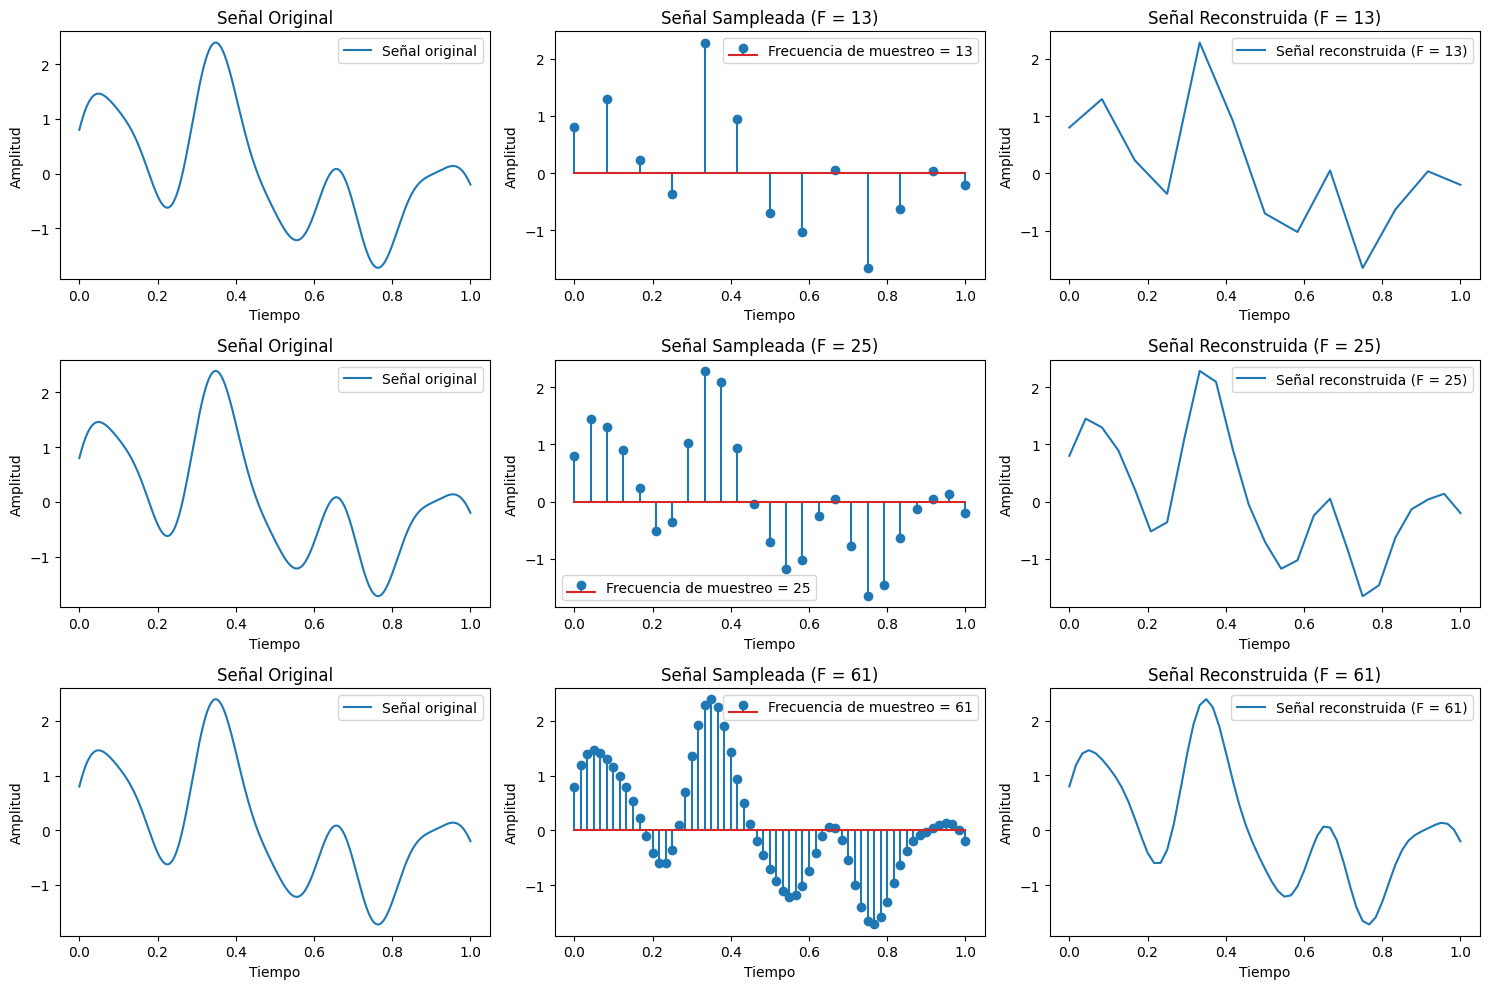

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal original
def original_signal(x):
    return np.sin(2*np.pi*x) + 0.5*np.cos(5*np.pi*x) + np.sin(7*np.pi*x) + 0.3*np.cos(12*np.pi*x)

# Frecuencia máxima de la señal original
Fmax = 12

# Definición de la frecuencia de muestreo para los tres casos
f_cases = [Fmax + 1, 2*Fmax + 1, 5*Fmax + 1]

# Rango de valores de x para la señal original
x_values = np.linspace(0, 1, 1000)

plt.figure(figsize=(15, 10))

for i, f in enumerate(f_cases):
    # Muestrear la señal original
    x_sampled = np.linspace(0, 1, f)
    y_sampled = original_signal(x_sampled)
    
    # Reconstruir la señal a partir del muestreo usando interpolación lineal
    reconstructed_signal = np.interp(x_values, x_sampled, y_sampled)
    
    # Graficar la señal original, la señal sampleada y la señal reconstruida
    plt.subplot(3, 3, i*3 + 1)
    plt.plot(x_values, original_signal(x_values), label='Señal original')
    plt.title('Señal Original')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(3, 3, i*3 + 2)
    plt.stem(x_sampled, y_sampled, label=f'Frecuencia de muestreo = {f}')
    plt.title(f'Señal Sampleada (F = {f})')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(3, 3, i*3 + 3)
    plt.plot(x_values, reconstructed_signal, label=f'Señal reconstruida (F = {f})')
    plt.title(f'Señal Reconstruida (F = {f})')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()

plt.tight_layout()
plt.show()


### 3.6 Explica tus hallazgos

Para abordar estos casos, primero hay que entender el concepto de teorema de muestreo (Nyquist-Shannon). Este teorema establece que para evitar la pérdida de información al muestrear una señal analógica y luego reconstruirla, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima de la señal (es decir, $f≥2 \cdot F max$). Si no se cumple esta condición, se puede producir un fenómeno conocido como aliasing, donde frecuencias más altas se "muestrean" incorrectamente como frecuencias más bajas.

Si la frecuencia de muestreo ($f$) es mayor que la frecuencia máxima de la señal ($F_{\text{max}}$), pero no cumple con el criterio de Nyquist ($f < 2 \cdot F_{\text{max}}$), aún podríamos tener aliasing si hay componentes de frecuencia presentes en la señal que exceden $F_{\text{max}}$. Por lo tanto, podríamos obtener una señal muestreada incorrectamente y una reconstrucción inexacta.

Si la frecuencia de muestreo ($f$) es mayor que $2 \cdot F_{\text{max}}$, se cumple el criterio de Nyquist. Esto garantiza que no haya aliasing y que la señal pueda ser reconstruida con precisión a partir de sus muestras.
    
Si la frecuencia de muestreo ($f$) es mayor que $5 \cdot F_{\text{max}}$, existe un margen de seguridad aún mayor contra el aliasing. La reconstrucción de la señal debería ser aún más precisa.
​


## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py